In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# set defaults
plt.style.use('seaborn-white')   # seaborn custom plot style
plt.rc('figure', dpi=100, figsize=(7, 5))   # set default size/resolution
plt.rc('font', size=12)   # font size

tips = sns.load_dataset('tips')

# Announcement
 - Lab09 and Project05

# Examples

Outline

* Grid Search / Classification.
* Regression with feature selection (multicolinearity)
* Text model (bag of words /  tfidf).

### Example: Predicting Diabetes

* Given health measurements, can you predict whether an individual will develop diabetes?
* Classification of health outcomes: 0=NO DIABETES and 1=DIABETES
* We will use 'accuracy' to evaluate the model (not necessarily the best choice!)

In [2]:
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes[['Pregnancies','Insulin', 'BMI', 'Glucose', 'Outcome']].describe()

,Pregnancies,Insulin,BMI,Glucose,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,79.799479,31.992578,120.894531,0.348958
std,3.369578,115.244002,7.884160,31.972618,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,27.300000,99.000000,0.000000
50%,3.000000,30.500000,32.000000,117.000000,0.000000
75%,6.000000,127.250000,36.600000,140.250000,1.000000
max,17.000000,846.000000,67.100000,199.000000,1.000000


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
# features
X = diabetes.drop('Outcome', axis=1)
# outcome
y = diabetes.Outcome

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [7]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 

In [8]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
# proportion for correct values
clf.score(X_train, y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.6926406926406926

In [11]:
# look at the importance of each feature in our tree model
# _: attributes created when model is fit. Contains info that it learned from the data
dict(zip(X.columns, clf.feature_importances_))

{'Pregnancies': 0.060093209772561565,
 'Glucose': 0.2878757655774352,
 'BloodPressure': 0.11430818403952037,
 'SkinThickness': 0.048202403067953044,
 'Insulin': 0.06827663237810808,
 'BMI': 0.18991726031752945,
 'DiabetesPedigreeFunction': 0.10317248753134284,
 'Age': 0.1281540573155494}

In [12]:
# maximum depth
clf.tree_.max_depth

13

In [13]:
# node count
clf.tree_.node_count

169

In [14]:
clf_small = DecisionTreeClassifier(max_depth=2)
clf_small.fit(X_train, y_train)
clf_small.score(X_train, y_train)

0.7672253258845437

In [15]:
clf_small.score(X_test, y_test)

0.7835497835497836

In [16]:
from util import tree_to_code

In [17]:
tree_to_code(clf_small, X.columns)

def tree(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
  if Glucose <= 127.5:
    if Glucose <= 103.5:
      return [[159.  13.]]
    else:  # if Glucose > 103.5
      return [[118.  46.]]
  else:  # if Glucose > 127.5
    if BMI <= 28.84999942779541:
      return [[35. 11.]]
    else:  # if BMI > 28.84999942779541
      return [[ 41. 114.]]


In [18]:
tree_to_code(clf, X.columns)

def tree(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
  if Glucose <= 127.5:
    if Glucose <= 103.5:
      if Age <= 25.5:
        return [[88.  0.]]
      else:  # if Age > 25.5
        if BMI <= 28.5:
          return [[30.  0.]]
        else:  # if BMI > 28.5
          if DiabetesPedigreeFunction <= 1.159999966621399:
            if DiabetesPedigreeFunction <= 0.22549999505281448:
              return [[12.  0.]]
            else:  # if DiabetesPedigreeFunction > 0.22549999505281448
              if Pregnancies <= 9.0:
                if BloodPressure <= 77.0:
                  if DiabetesPedigreeFunction <= 0.3085000067949295:
                    return [[0. 2.]]
                  else:  # if DiabetesPedigreeFunction > 0.3085000067949295
                    if Glucose <= 96.5:
                      if Glucose <= 32.5:
                        return [[0. 1.]]
                      else:  # if Glucose > 32.5
                      

## How to select model parameters?

* Each combination of model parameters requires: 
    - fitting a model; evaluating the model; comparing performance.
* This leads to training perhaps *thousands* of models!
    - How to do this in a computationally feasible way?
    - How to keep your code clean to keep track?

## How to select model parameters?

* How to select in a computationally feasible way?
    - Trying every combination ('grid search') works for smaller data/models.
    - Sampling possible combinations of parameters using probabilistic reasoning.
    
* How to keep your code clean to keep track?
    - The `sklearn.model_selection` package.

### Example: parameter search for diabetes prediction

* Decision tree has possible parameters:
    - `max_depth`, `min_samples_split`, `min_samples_leaf`
    - plus others we won't consider
    
* We will use `GridSearchCV` to explore parameter combinations using cross-validation

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
# How many combinations are there to search through?

parameters = {
    'max_depth': [2,3,4,5,7,10,13,15,18,None], 
    'min_samples_split':[2,3,5,7,10,15,20],
    'min_samples_leaf':[2,3,5,7,10,15,20]
}

In [26]:
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5)

In [27]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 7, 10, 13, 15, 18, None],
 

In [29]:
clf.best_params_

{'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 2}

In [30]:
# number of models fit
len(clf.cv_results_['mean_test_score'])

490

### Was the "best parameter" the only "best choice"

* Plot the histogram of scores across all models
* Many high values implies many good model choices
    - Robust model
* Plot the histogram of standard deviations for the CVs
    - many small numbers imply most parameters give stable models.

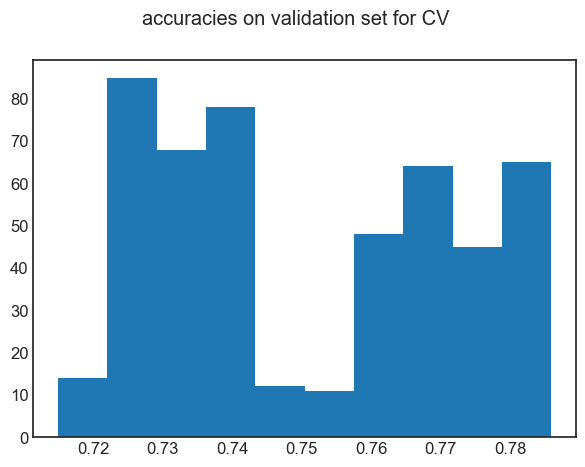

In [31]:
# Each x-value is the score of a different model,
# corresponding to a choice of parameters
#
plt.hist(clf.cv_results_['mean_test_score'])
plt.suptitle('accuracies on validation set for CV');

In [32]:
# if most models were good and had high accuracy => good
# you do not want a model that really depends on parameter choices => likely, overfitting
# if a lot of good model choices: you are learning real patterns in the data 


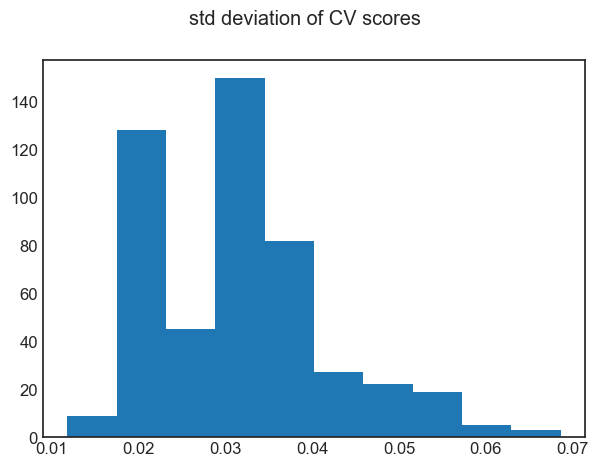

In [33]:
# Each x-value is the standard deviation for the 5-fold CV for a single model
# corresponding to a choice of parameters
plt.hist(clf.cv_results_['std_test_score'])
plt.suptitle('std deviation of CV scores');

In [34]:
# if we have a high std of accuracy: model varied a lot, depending on how 
# you split your data.
# If std is low, then you are getting the same model performace 
# ^^ tells you what you should expect for fluctuation in your accuracy above


In [35]:
clf_best = clf.best_estimator_

In [36]:
clf.score(X_test, y_test)

0.7186147186147186

In [37]:
tree_to_code(clf_best, X.columns)

def tree(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
  if Glucose <= 154.5:
    if BMI <= 27.34999942779541:
      if BMI <= 26.15000057220459:
        if DiabetesPedigreeFunction <= 0.6525000035762787:
          return [[87.  0.]]
        else:  # if DiabetesPedigreeFunction > 0.6525000035762787
          return [[19.  1.]]
      else:  # if BMI > 26.15000057220459
        return [[20.  2.]]
    else:  # if BMI > 27.34999942779541
      if Age <= 30.5:
        if Glucose <= 112.5:
          return [[85.  8.]]
        else:  # if Glucose > 112.5
          return [[60. 27.]]
      else:  # if Age > 30.5
        if DiabetesPedigreeFunction <= 0.5139999985694885:
          return [[58. 36.]]
        else:  # if DiabetesPedigreeFunction > 0.5139999985694885
          return [[13. 44.]]
  else:  # if Glucose > 154.5
    if Glucose <= 167.0:
      return [[11. 17.]]
    else:  # if Glucose > 167.0
      if SkinThickness <= 26.5:
        r

## Regression with Multicollinearity

* Linear regression with (perfectly) correlated features leads to high variance (unstable) models.
* When the dataset ~1-dimensional in 3-dim space, fitting a plane is under-determined.
* Regression gives you a plane of best fit but there are other planes that will give very similar error when fitting it that look very different: overfit model
* Use Principal Component Analysis to drop unneeded features.

<img src="imgs/multicollinearity.png" width="50%">

## Regression: predicting tips data

* Use quantitative feature "as is".
* Use all features: one-hot encode categorical features.
    - Many perfectly correlated features: e.g. `is_Lunch` and `is_Dinner`.

In [38]:
tips = sns.load_dataset('tips')

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Determining Correlated features

How many columns can we keep without losing information?

In [40]:
catcols = ['sex', 'smoker', 'day', 'time']
pd.get_dummies(tips).head()      # only use get_dummies for illustration, NOT model building!

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


## Creating a Regression Pipeline
* Drop correlated features using Principal Component Analysis (PCA)
* Categorical Variables: One-Hot Encoding => PCA (drop correlated features)
* Quantitative Variables: Pass-through
* Estimator: Linear Regression

In [41]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [42]:
# svd_solver: how much information do you want to drop
# default: drops nothing
cats = Pipeline([
    ('ohe', OneHotEncoder(sparse=False)), 
    ('pca', PCA(svd_solver='full'))
])
catcols = ['sex', 'smoker', 'day', 'time']

nums = FunctionTransformer(lambda x:x)
numcols = ['total_bill', 'size']

ct = ColumnTransformer([('cat', cats, catcols), ('num', nums, numcols)])

pl = Pipeline([('feats', ct), ('lr', LinearRegression())])

### Use Parameter Grid-Search with Cross-Validation

* Inspect the parameters of the pipeline with `get_params`: use to get keys for parameter-grid.
* Train models using a grid search and analyze the results!

In [43]:
pl.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'feats', 'lr', 'feats__n_jobs', 'feats__remainder', 'feats__sparse_threshold', 'feats__transformer_weights', 'feats__transformers', 'feats__verbose', 'feats__cat', 'feats__num', 'feats__cat__memory', 'feats__cat__steps', 'feats__cat__verbose', 'feats__cat__ohe', 'feats__cat__pca', 'feats__cat__ohe__categories', 'feats__cat__ohe__drop', 'feats__cat__ohe__dtype', 'feats__cat__ohe__handle_unknown', 'feats__cat__ohe__sparse', 'feats__cat__pca__copy', 'feats__cat__pca__iterated_power', 'feats__cat__pca__n_components', 'feats__cat__pca__random_state', 'feats__cat__pca__svd_solver', 'feats__cat__pca__tol', 'feats__cat__pca__whiten', 'feats__num__accept_sparse', 'feats__num__check_inverse', 'feats__num__func', 'feats__num__inv_kw_args', 'feats__num__inverse_func', 'feats__num__kw_args', 'feats__num__validate', 'lr__copy_X', 'lr__fit_intercept', 'lr__n_jobs', 'lr__normalize'])

In [44]:
# None: keep all variables
# 0.90 : keep 90% of the information
params = {'feats__cat__pca__n_components':[0.90, 0.99, None]}
grids = GridSearchCV(pl, param_grid=params, cv=5)

In [45]:
X_tr, X_ts, y_tr, y_ts = train_test_split(tips, tips.tip)
grids.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('feats',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('ohe',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                                 

In [46]:
grids.best_params_

{'feats__cat__pca__n_components': 0.9}

In [47]:
# The best_score_ is the average over your cross-validation fold scores of the best model 
# (best in exactly that sense: scores highest on average over folds)
grids.best_score_

0.32806368205747943

In [48]:
grids.cv_results_

{'mean_fit_time': array([0.01236629, 0.00817795, 0.00698156]),
 'std_fit_time': array([6.23066890e-03, 3.99136554e-04, 3.16297988e-07]),
 'mean_score_time': array([0.00498719, 0.00359054, 0.00398927]),
 'std_score_time': array([1.09292816e-03, 4.88675213e-04, 2.78041453e-07]),
 'param_feats__cat__pca__n_components': masked_array(data=[0.9, 0.99, None],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'feats__cat__pca__n_components': 0.9},
  {'feats__cat__pca__n_components': 0.99},
  {'feats__cat__pca__n_components': None}],
 'split0_test_score': array([0.4967131 , 0.49800445, 0.42003935]),
 'split1_test_score': array([0.11640378, 0.11597059, 0.11952294]),
 'split2_test_score': array([0.01411213, 0.01205035, 0.01205035]),
 'split3_test_score': array([0.4490902 , 0.44851674, 0.44851674]),
 'split4_test_score': array([0.56399919, 0.55666138, 0.55364392]),
 'mean_test_score': array([0.32806368, 0.3262407 , 0.31075466]),
 'std_test_s

In [49]:
grids.best_estimator_.score(X_ts, y_ts)

0.39667779272806725

## Housing Price Prediction: Sales Price from House Characteristics

* Create a 'baseline' model: a model pipeline without ingenuity.
* Try to improve upon the the baseline with creativity and domain knowledge.

In [50]:
housing = pd.read_csv('data/housing.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
# drop id and SalesPrice from features

X = housing.drop(['Id', 'SalePrice'], axis=1)
y = housing['SalePrice']

## Baseline Model

* Do the 'minimum' to fit a model and check the performance.
    - Quantitative: impute with zero and pass-through (Why is zero not a *terrible* choice?)
    - Categorical: One-hot encoding (what assumption is this making about the data?)

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
types = X.dtypes
catcols = types.loc[types == np.object].index
numcols = types.loc[types != np.object].index

In [66]:
cats = Pipeline([
    ('imp', SimpleImputer(strategy='constant', fill_value='NULL')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)),
#    ('pca', PCA(svd_solver='full', n_components=0.99))
])

ct = ColumnTransformer([
    ('catcols', cats, catcols),
    ('numcols', SimpleImputer(strategy='constant', fill_value=0), numcols)
])

pl = Pipeline([('feats', ct), ('reg', LinearRegression())])

In [67]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

In [68]:
pl.fit(X_tr, y_tr)
pl.score(X_ts, y_ts)

0.41566482341099775

In [57]:
preds = pl.predict(X_ts)
np.sqrt(np.mean(preds - y_ts)**2)

485906289.6189801

In [58]:
out = []
for _ in range(100):
    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)
    pl.fit(X_tr, y_tr)
    out.append(pl.score(X_ts, y_ts))

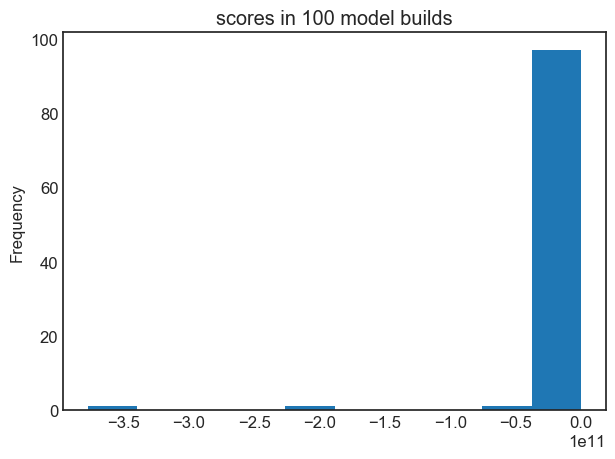

In [59]:
pd.Series(out).plot(kind='hist', title='scores in 100 model builds');

## Improved Model

Question: What features and model improvements can we use?

In [60]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Improved Model

* If using linear regression: PCA to drop extra information.
* Better techniques for categorical encoding? (Ordinal vs Nominal?)
* Better techniques for imputation?
* Other models to try? (Tree-based?)

In [61]:
from sklearn.ensemble import RandomForestRegressor

cats = Pipeline([
    ('imp', SimpleImputer(strategy='constant', fill_value='NULL')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('pca', PCA(svd_solver='full', n_components=0.99))
])

ct = ColumnTransformer([
    ('catcols', cats, catcols),
    ('numcols', SimpleImputer(strategy='constant', fill_value=0), numcols)
])

pl = Pipeline([('feats', ct), ('reg', RandomForestRegressor())])

In [62]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

In [63]:
pl.fit(X_tr, y_tr)
pl.score(X_ts, y_ts)

0.8152905470073489

In [64]:
preds = pl.predict(X_ts)
np.sqrt(np.mean(preds - y_ts)**2)

3202.7924657534236

In [65]:
out = []
for _ in range(100):
    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)
    pl.fit(X_tr, y_tr)
    out.append(pl.score(X_ts, y_ts))

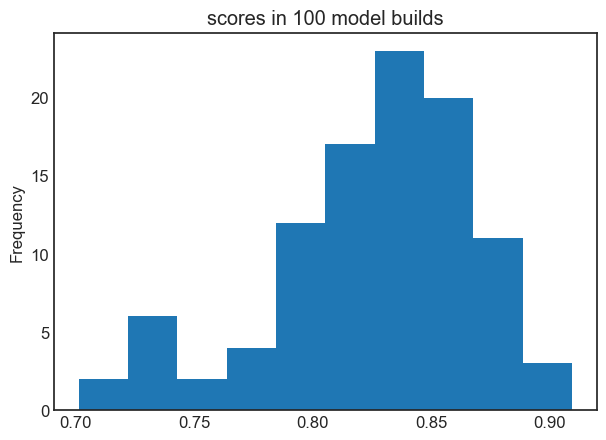

In [69]:
pd.Series(out).plot(kind='hist', title='scores in 100 model builds');

## Predicting Reviews

In [ ]:
reviews = pd.read_json(open('../../labs/lab09/data/reviews.json'), lines=True)

In [ ]:
reviews.head()

In [ ]:
X = reviews['summary']
y = (reviews[['overall']] > 3).astype(int)

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
count_vec = CountVectorizer()

In [ ]:
count_vec.fit(X_tr)

In [ ]:
vocab = sorted(count_vec.vocabulary_, key=lambda x:x[1])

pd.DataFrame(
    data=count_vec.transform(X).toarray(),
    columns=vocab
).head()

In [ ]:
pl = Pipeline([
    ('cv', CountVectorizer()), 
    ('clf', RandomForestClassifier(max_depth=8, n_estimators=7))
])

In [ ]:
pl.fit(X_tr, y_tr)

In [ ]:
pl.score(X_ts, y_ts)

In [ ]:
clf = pl.named_steps['clf']

In [ ]:
# What are the most important features?
pd.Series(
    data=clf.feature_importances_,
    index=vocab
).sort_values(ascending=False)

In [ ]:
word = 'annoy'

reviews[reviews['summary'].str.lower().str.contains(word)]

In [ ]:
reviews[reviews['summary'].str.lower().str.contains(word)].overall.plot(kind='hist')

In [ ]:
pl.get_params().keys()

In [ ]:
params = {
    'clf__max_depth': np.arange(2,500,20)
}

In [ ]:
grids = GridSearchCV(pl, param_grid=params, cv=3)

In [ ]:
grids.fit(X_tr, y_tr)

In [ ]:
index = grids.param_grid['clf__max_depth']
test = grids.cv_results_['mean_test_score']
train = grids.cv_results_['mean_train_score']

In [ ]:
pd.DataFrame({'test': test, 'train': train}, index=index).plot()

In [ ]:
params = {
    'clf__n_estimators': [2, 5, 10, 25, 100],
    'clf__max_depth': [2, 5, 9, None],
    'cv__max_features': [100, None], 
    'cv__strip_accents': [None, 'unicode']
}

In [ ]:
grids = GridSearchCV(pl, param_grid=params, cv=3)

In [ ]:
grids.fit(X_tr, y_tr)

In [ ]:
grids.best_params_